In [1]:
%load_ext watermark
%watermark

Last updated: 2024-08-07T14:22:08.531607-05:00

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.12.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [2]:
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,12) # 10 pulgadas de ancho y 10 de alto para todos los plots

### Lectura de datos

In [4]:
df_consumo = pd.read_csv("Data/df_consumo_sustancias.2.limpio_analisis.csv")

In [5]:
df_consumo.head()

,directorio,per_sexo,per_edad,vive_padre_hogar,vive_madre_hogar,departamento,municipio,tipo_vivienda,estrato,residentes_hogar,...,g_11_j_consumio_alguna_vez_heroina,g_11_j_anios_consumio_heroina,k_03_consumio_marihuana_12m,k_04_frecuencia_consumo_marihuana_12m,l_02_consumio_cocaina_12m,l_03_frecuencia_consumo_cocaina_12m,m_02_consumio_basuco_12m,m_03_frecuencia_consumo_basuco_12m,o_02_consumio_heroina_12m,o_03_frecuencia_consumo_heroina_12m
0,11207,1,19,2,2,Guaviare,SAN JOSÉ DEL GUAVIARE,2,2.0,5,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1180,2,51,2,1,Cordoba,MONTERÍA,1,1.0,4,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4398,1,52,3,3,Caqueta,FLORENCIA,1,2.0,4,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4399,2,39,1,1,Bolivar,CARTAGENA,1,5.0,6,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2619,2,27,1,1,Tolima,ESPINAL,1,2.0,4,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En este paso vamos a agregar aquellas variables que se puedan agregar en tipos más genéricos. Esto ayuda a analizar los por grupos en vez de por elementos individuales.

Para ello podemos ver el numero de valores distintos que cada variable categorica tiene

In [7]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))

unique_col_values(df_consumo)

directorio | 10000 | int64
per_sexo | 2 | int64
per_edad | 54 | int64
vive_padre_hogar | 3 | int64
vive_madre_hogar | 3 | int64
departamento | 33 | object
municipio | 135 | object
tipo_vivienda | 4 | int64
estrato | 6 | float64
residentes_hogar | 14 | int64
d_01_aporta_dinero_hogar | 2 | int64
d_02_situacion_actual | 8 | int64
d_08_estado_salud | 5 | int64
d_09_deprimido | 2 | int64
d_10_poco_interes | 2 | int64
d_11_h_conocimiento_riesgo_fumar_marihuana_frecuentemente | 5 | int64
d_11_k_conocimiento_riesgo_cocaina_frecuentemente | 5 | int64
d_11_n_conocimiento_riesgo_fumar_basuco_frecuentemente | 5 | int64
d_12_b_presenta_problema_consumo_sp_barrio | 2 | int64
d_12_c_presenta_problema_expendio_sp_barrio | 2 | int64
d2_01_etnia | 6 | int64
d2_03_estado_civil | 6 | int64
d2_04_num_hijos | 13 | int64
d2_05_nivel_educativo | 8 | int64
g_01_familiares_consumen_sp | 2 | int64
g_01_a_num_familiares_consumen_sp | 3 | float64
g_02_amigos_consumen_sp | 2 | int64
g_02_a_num_amigos_consumen_sp | 

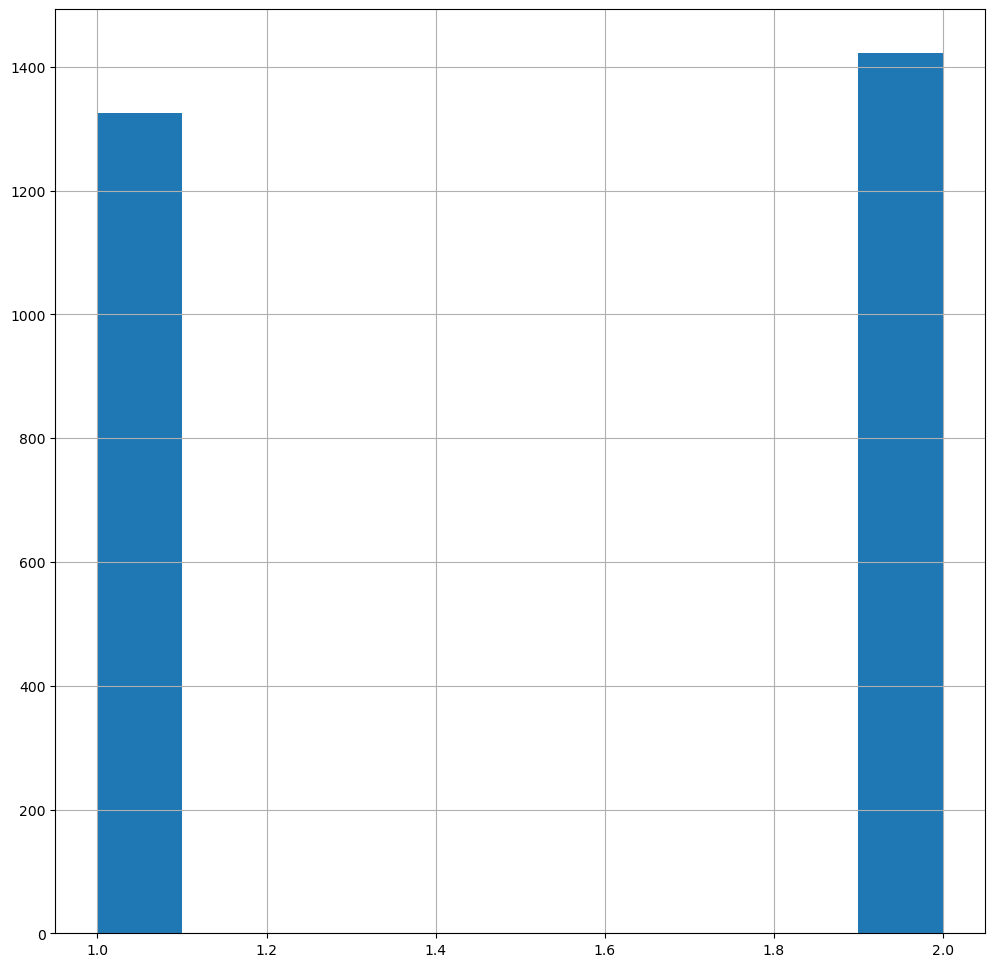

In [8]:
df_consumo.g_01_a_num_familiares_consumen_sp.hist();

### Posibles variables a categorizar
- estrato = bajo, medio, alto, 
- situacion = trabajando, estudiando, desempleado, otra actividad
- edades persona y edades por consumo en total categorizar 4  

### Agrupacion de variables categoricas

##### Edad

In [9]:
df_consumo.per_edad.unique()

array([19, 51, 52, 39, 27, 46, 38, 47, 55, 15, 57, 26, 30, 34, 28, 17, 24,
       23, 12, 36, 62, 53, 50, 20, 16, 29, 22, 60, 61, 40, 65, 63, 32, 59,
       25, 45, 42, 31, 37, 18, 21, 56, 58, 33, 13, 44, 35, 48, 14, 64, 43,
       49, 54, 41], dtype=int64)

In [10]:
def clasificar_edades(edad):
    if edad <= 18:
        return 'Adolescente'
    elif edad <= 27:
        return 'Joven'
    elif edad <= 59:
        return 'Adulto'
    else:
        return 'Persona mayor'
    
df_consumo['per_edad_tipo'] = df_consumo['per_edad'].apply(clasificar_edades)

In [11]:
df_consumo.per_edad_tipo = df_consumo.per_edad_tipo.astype("category")

In [12]:
df_consumo.per_edad_tipo.dtype

CategoricalDtype(categories=['Adolescente', 'Adulto', 'Joven', 'Persona mayor'], ordered=False)

In [13]:
df_consumo.per_edad_tipo.value_counts()

Adulto           5798
Joven            2458
Adolescente       902
Persona mayor     842
Name: per_edad_tipo, dtype: int64

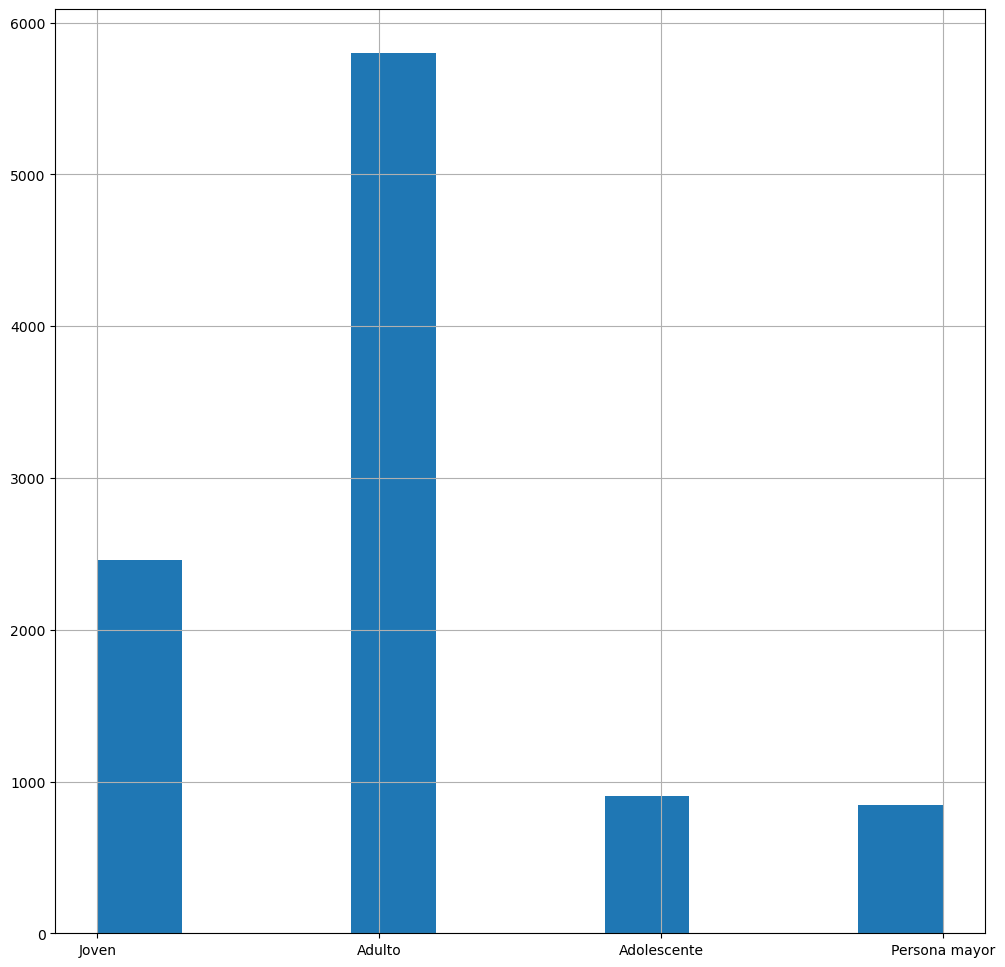

In [14]:
df_consumo.per_edad_tipo.hist();

##### Estrato

In [15]:
df_consumo.estrato.unique()

array([2., 1., 5., 3., 6., 4.])

In [16]:
bajo = [1,2]
medio = [3,4]
alto = [5,6]

df_consumo.loc[df_consumo['estrato'].isin(bajo), 
             'estrato_tipo'] = 'Estrato bajo'

df_consumo.loc[df_consumo['estrato'].isin(medio), 
             'estrato_tipo'] = 'Estrato medio'

df_consumo.loc[df_consumo['estrato'].isin(alto), 
             'estrato_tipo'] = 'Estrato alto'

In [17]:
df_consumo.estrato_tipo = df_consumo.estrato_tipo.astype("category")

In [18]:
df_consumo.estrato_tipo.dtype

CategoricalDtype(categories=['Estrato alto', 'Estrato bajo', 'Estrato medio'], ordered=False)

In [19]:
df_consumo.estrato_tipo.value_counts()

Estrato bajo     6620
Estrato medio    3102
Estrato alto      278
Name: estrato_tipo, dtype: int64

##### Situación económica

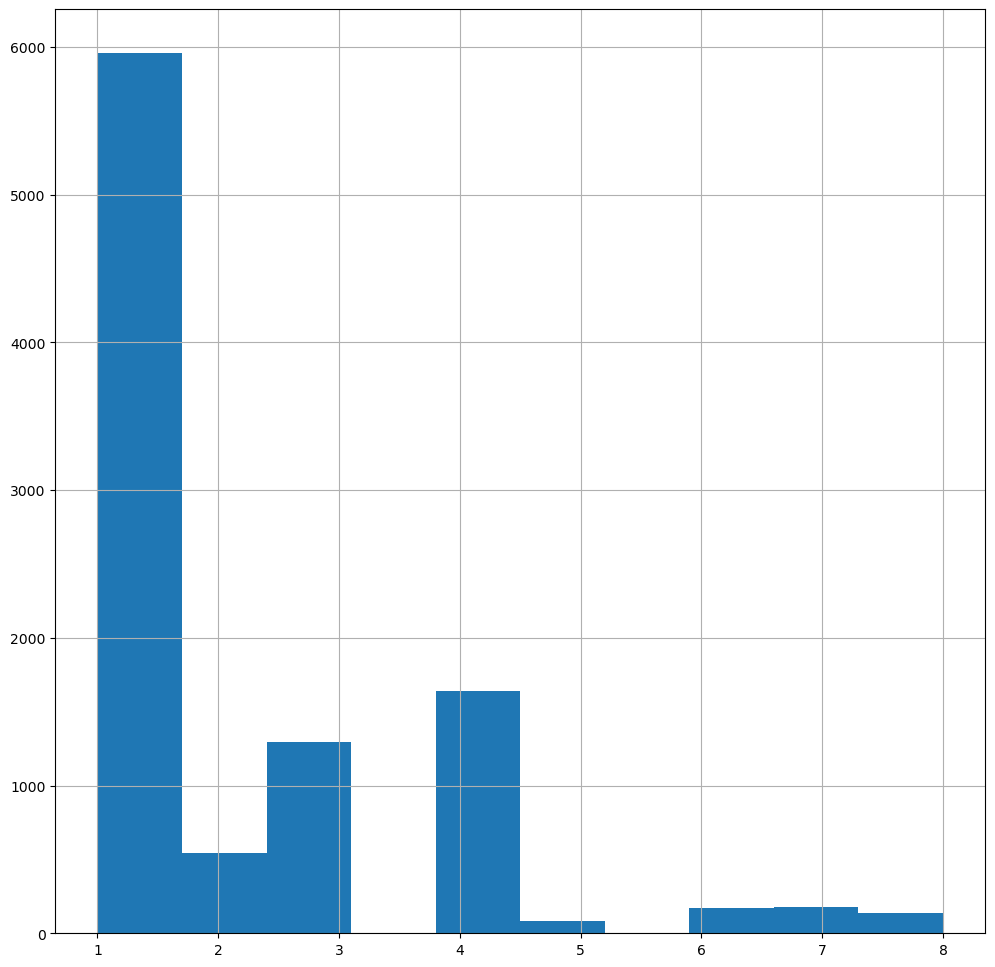

In [20]:
df_consumo.d_02_situacion_actual.hist();

In [21]:
df_consumo.d_02_situacion_actual.unique()

array([1, 2, 7, 3, 4, 5, 8, 6], dtype=int64)

Lista de códigos que representan situaciones que se considerarán como 'Otros'.

Asignación de tipos de situación en la columna 'situacion_tipo' según los valores de 'd_02_situacion_actual'

In [22]:

otros=[4,5,6,7,8]

df_consumo.loc[df_consumo['d_02_situacion_actual']==1, 'situacion_tipo'] = 'Trabajando'

df_consumo.loc[df_consumo['d_02_situacion_actual']==2, 'situacion_tipo'] = 'Buscando trabajo'

df_consumo.loc[df_consumo['d_02_situacion_actual']==3, 'situacion_tipo'] = 'Estudiando'

df_consumo.loc[df_consumo['d_02_situacion_actual'].isin(otros), 'situacion_tipo'] = 'Otros'

In [23]:
df_consumo.situacion_tipo = df_consumo.situacion_tipo.astype("category")

In [24]:
df_consumo.situacion_tipo.dtype

CategoricalDtype(categories=['Buscando trabajo', 'Estudiando', 'Otros', 'Trabajando'], ordered=False)

In [25]:
df_consumo.situacion_tipo.value_counts()

Trabajando          5958
Otros               2204
Estudiando          1297
Buscando trabajo     541
Name: situacion_tipo, dtype: int64

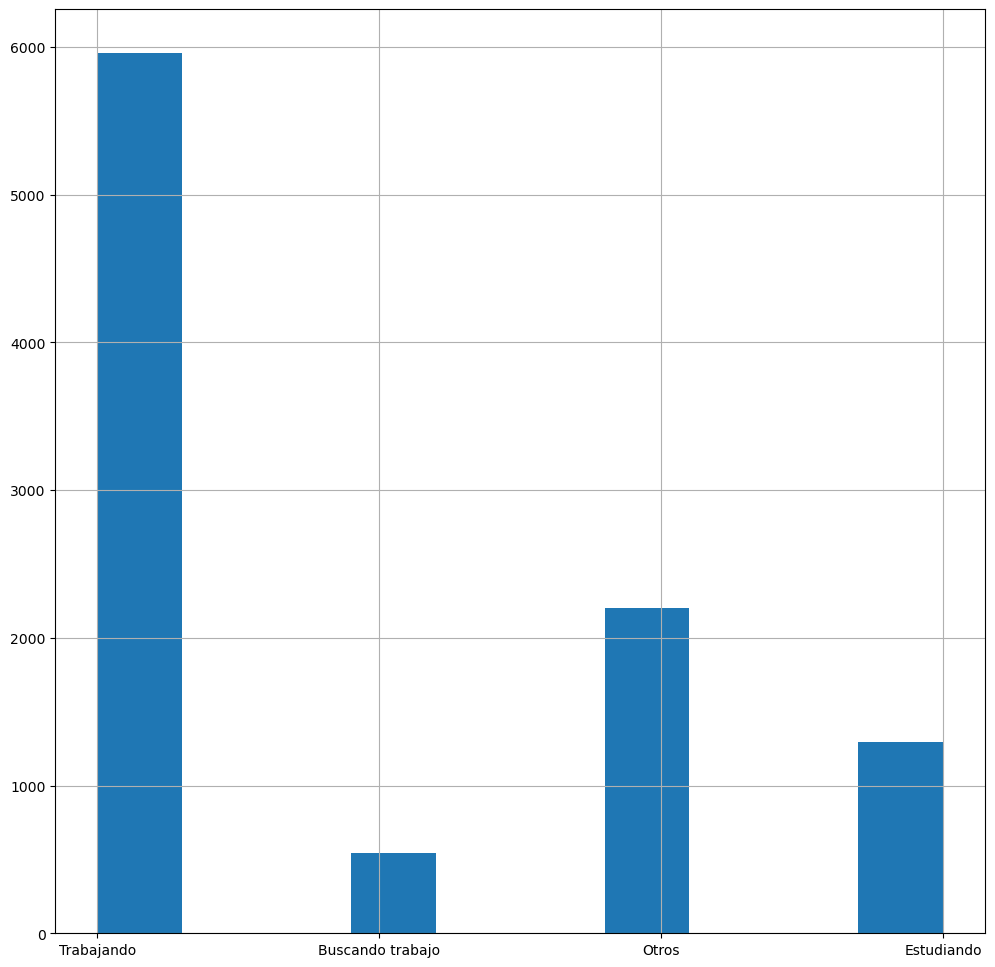

In [26]:
df_consumo.situacion_tipo.hist();

##### Variable frecuencia_consumo_marihuana_tipo

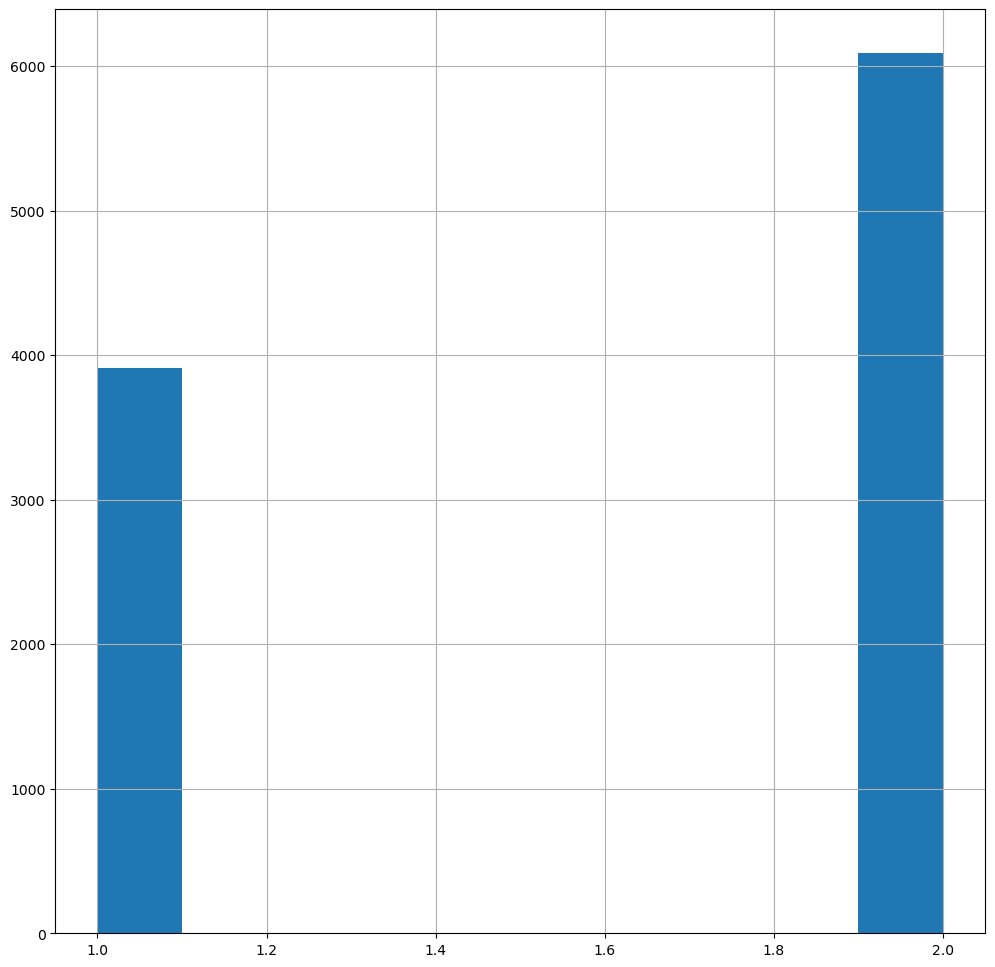

In [27]:
df_consumo.g_11_f_consumio_alguna_vez_marihuana.hist();

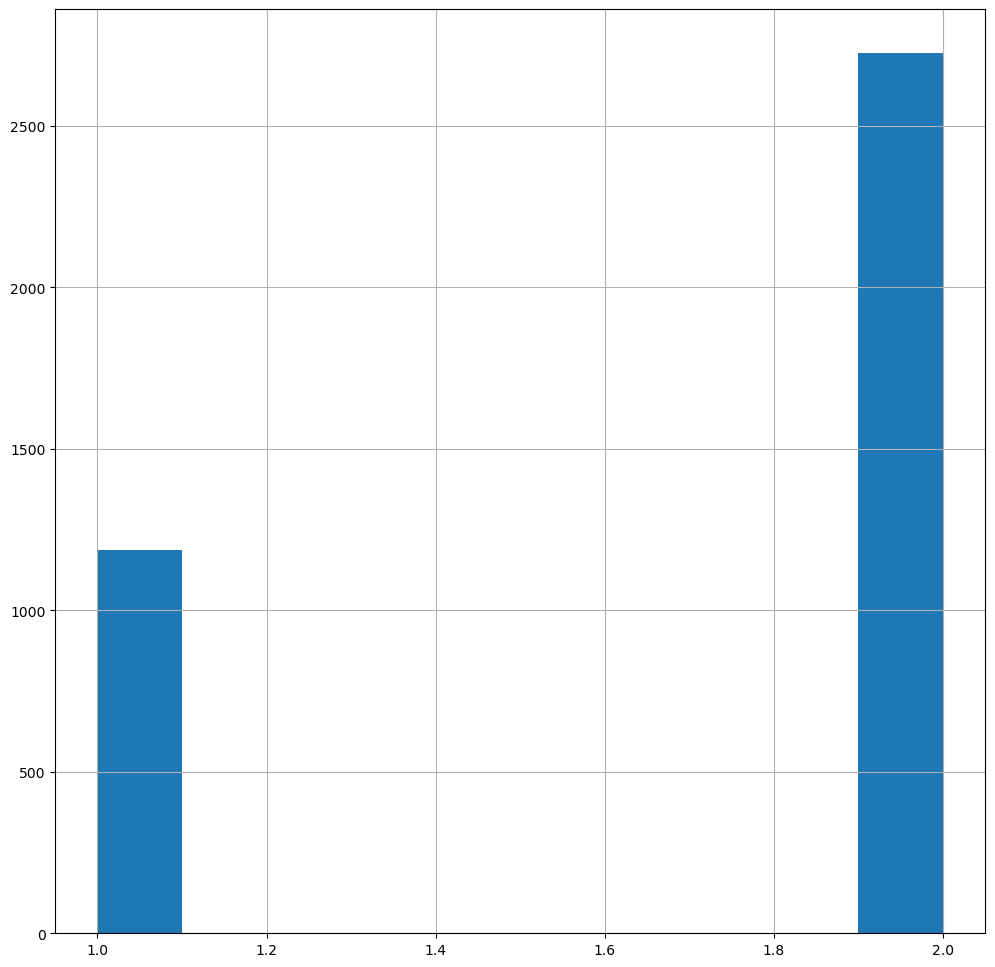

In [28]:
df_consumo.k_03_consumio_marihuana_12m.hist();

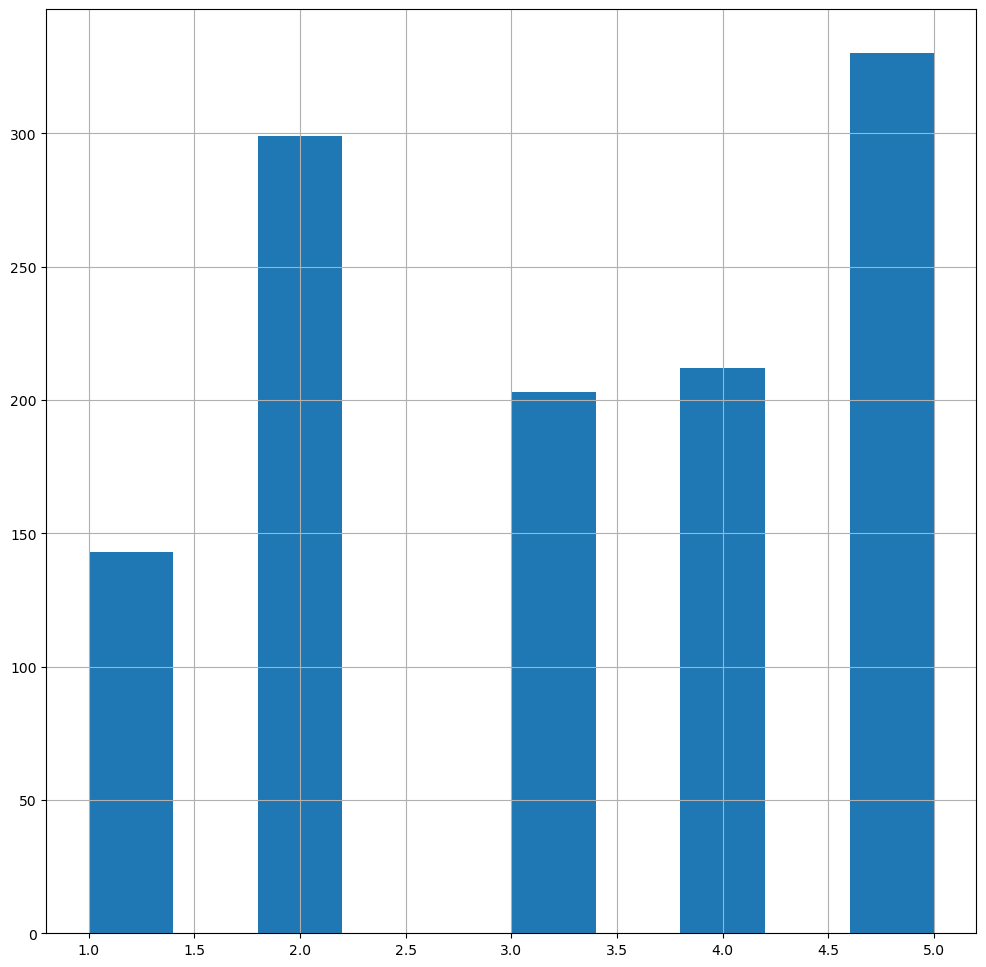

In [29]:
df_consumo.k_04_frecuencia_consumo_marihuana_12m.hist();

In [30]:
df_consumo.k_04_frecuencia_consumo_marihuana_12m.unique()

array([nan,  2.,  1.,  3.,  5.,  4.])

In [31]:
df_consumo.g_11_f_consumio_alguna_vez_marihuana.unique()

array([2, 1], dtype=int64)

In [32]:
df_consumo.k_03_consumio_marihuana_12m.unique()

array([nan,  2.,  1.])

Asignación de tipos de frecuencia de consumo de marihuana en la columna 'frecuencia_consumo_marihuana_tipo'

In [33]:
df_consumo.loc[df_consumo['g_11_f_consumio_alguna_vez_marihuana']==2, 'frecuencia_consumo_marihuana_tipo'] = 'Nunca'

df_consumo.loc[(df_consumo['g_11_f_consumio_alguna_vez_marihuana']==1) & (df_consumo['k_03_consumio_marihuana_12m']==2), 'frecuencia_consumo_marihuana_tipo'] = 'Alguna vez en su vida'

df_consumo.loc[df_consumo['k_04_frecuencia_consumo_marihuana_12m']==1, 'frecuencia_consumo_marihuana_tipo'] = 'Una sola vez en los últimos 12 meses'

df_consumo.loc[df_consumo['k_04_frecuencia_consumo_marihuana_12m']==2, 'frecuencia_consumo_marihuana_tipo'] = 'Algunas veces durante los últimos 12 meses'

df_consumo.loc[df_consumo['k_04_frecuencia_consumo_marihuana_12m']==3, 'frecuencia_consumo_marihuana_tipo'] = 'Algunas veces mensualmente'

df_consumo.loc[df_consumo['k_04_frecuencia_consumo_marihuana_12m']==4, 'frecuencia_consumo_marihuana_tipo'] = 'Algunas veces semanalmente'

df_consumo.loc[df_consumo['k_04_frecuencia_consumo_marihuana_12m']==5, 'frecuencia_consumo_marihuana_tipo'] = 'Diariamente'

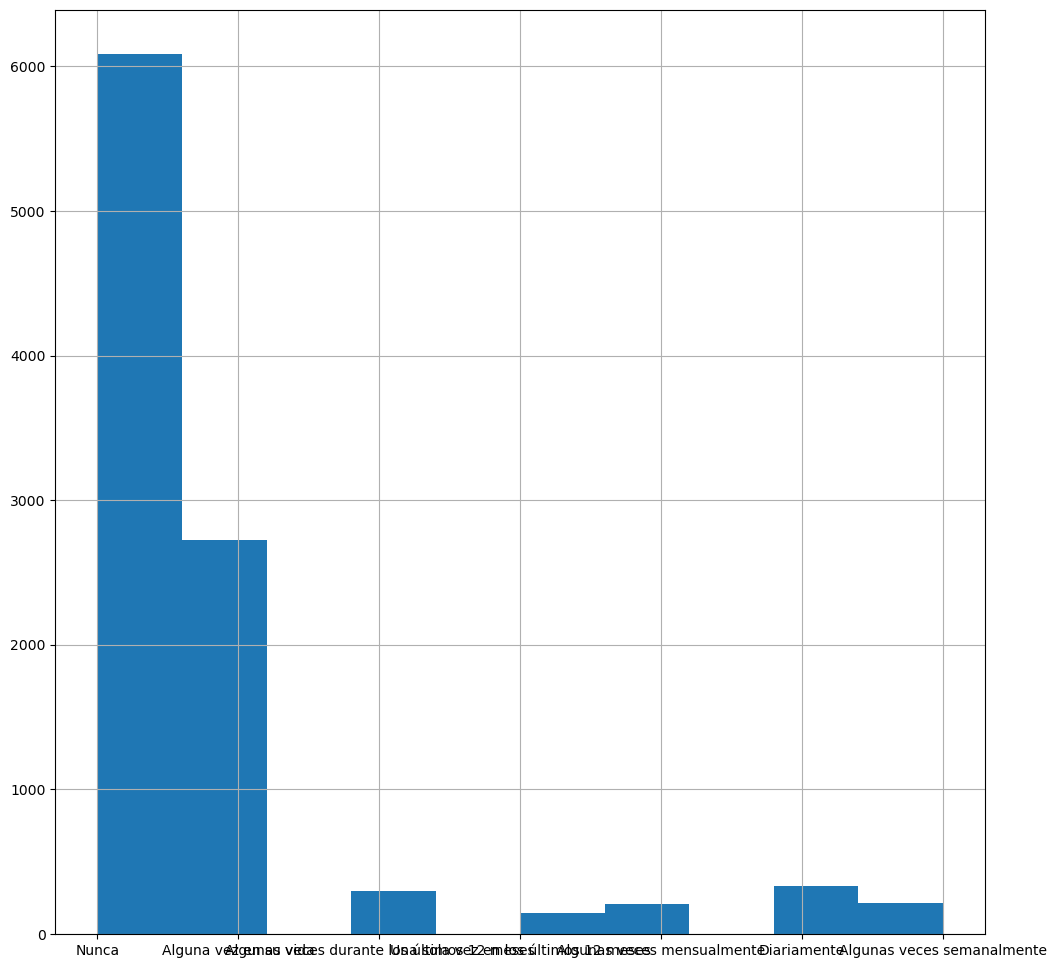

In [34]:
df_consumo.frecuencia_consumo_marihuana_tipo.hist();

In [35]:
df_consumo.frecuencia_consumo_marihuana_tipo = df_consumo.frecuencia_consumo_marihuana_tipo.astype("category")

In [36]:
df_consumo.frecuencia_consumo_marihuana_tipo.dtype

CategoricalDtype(categories=['Alguna vez en su vida',
                  'Algunas veces durante los últimos 12 meses',
                  'Algunas veces mensualmente', 'Algunas veces semanalmente',
                  'Diariamente', 'Nunca',
                  'Una sola vez en los últimos 12 meses'],
, ordered=False)

In [37]:
df_consumo.frecuencia_consumo_marihuana_tipo.value_counts()

Nunca                                         6088
Alguna vez en su vida                         2725
Diariamente                                    330
Algunas veces durante los últimos 12 meses     299
Algunas veces semanalmente                     212
Algunas veces mensualmente                     203
Una sola vez en los últimos 12 meses           143
Name: frecuencia_consumo_marihuana_tipo, dtype: int64

##### Variable frecuencia_consumo_cocaina_tipo

In [38]:
df_consumo.loc[df_consumo['g_11_g_consumio_alguna_vez_cocaina']==2, 'frecuencia_consumo_cocaina_tipo'] = 'Nunca'

df_consumo.loc[(df_consumo['g_11_g_consumio_alguna_vez_cocaina']==1) & (df_consumo['l_02_consumio_cocaina_12m']==2), 'frecuencia_consumo_cocaina_tipo'] = 'Alguna vez en su vida'

df_consumo.loc[df_consumo['l_03_frecuencia_consumo_cocaina_12m']==1, 'frecuencia_consumo_cocaina_tipo'] = 'Una sola vez en los últimos 12 meses'

df_consumo.loc[df_consumo['l_03_frecuencia_consumo_cocaina_12m']==2, 'frecuencia_consumo_cocaina_tipo'] = 'Algunas veces durante los últimos 12 meses'

df_consumo.loc[df_consumo['l_03_frecuencia_consumo_cocaina_12m']==3, 'frecuencia_consumo_cocaina_tipo'] = 'Algunas veces mensualmente'

df_consumo.loc[df_consumo['l_03_frecuencia_consumo_cocaina_12m']==4, 'frecuencia_consumo_cocaina_tipo'] = 'Algunas veces semanalmente'

df_consumo.loc[df_consumo['l_03_frecuencia_consumo_cocaina_12m']==5, 'frecuencia_consumo_cocaina_tipo'] = 'Diariamente'

In [39]:
df_consumo.frecuencia_consumo_cocaina_tipo = df_consumo.frecuencia_consumo_cocaina_tipo.astype("category")

In [40]:
df_consumo.frecuencia_consumo_cocaina_tipo.value_counts()

Nunca                                         9052
Alguna vez en su vida                          711
Algunas veces durante los últimos 12 meses      81
Algunas veces mensualmente                      47
Una sola vez en los últimos 12 meses            47
Algunas veces semanalmente                      44
Diariamente                                     18
Name: frecuencia_consumo_cocaina_tipo, dtype: int64

##### Variable frecuencia_consumo_basuco_tipo

In [41]:
df_consumo.loc[df_consumo['g_11_h_consumio_alguna_vez_basuco']==2, 'frecuencia_consumo_basuco_tipo'] = 'Nunca'

df_consumo.loc[(df_consumo['g_11_h_consumio_alguna_vez_basuco']==1) & (df_consumo['m_02_consumio_basuco_12m']==2), 'frecuencia_consumo_basuco_tipo'] = 'Alguna vez en su vida'

df_consumo.loc[df_consumo['m_03_frecuencia_consumo_basuco_12m']==1, 'frecuencia_consumo_basuco_tipo'] = 'Una sola vez en los últimos 12 meses'

df_consumo.loc[df_consumo['m_03_frecuencia_consumo_basuco_12m']==2, 'frecuencia_consumo_basuco_tipo'] = 'Algunas veces durante los últimos 12 meses'

df_consumo.loc[df_consumo['m_03_frecuencia_consumo_basuco_12m']==3, 'frecuencia_consumo_basuco_tipo'] = 'Algunas veces mensualmente'

df_consumo.loc[df_consumo['m_03_frecuencia_consumo_basuco_12m']==4, 'frecuencia_consumo_basuco_tipo'] = 'Algunas veces semanalmente'

df_consumo.loc[df_consumo['m_03_frecuencia_consumo_basuco_12m']==5, 'frecuencia_consumo_basuco_tipo'] = 'Diariamente'

In [42]:
df_consumo.frecuencia_consumo_basuco_tipo = df_consumo.frecuencia_consumo_basuco_tipo.astype("category")

In [43]:
df_consumo.frecuencia_consumo_basuco_tipo.value_counts()

Nunca                                         9699
Alguna vez en su vida                          249
Algunas veces durante los últimos 12 meses      14
Algunas veces semanalmente                      12
Diariamente                                     12
Algunas veces mensualmente                      11
Una sola vez en los últimos 12 meses             3
Name: frecuencia_consumo_basuco_tipo, dtype: int64

##### Variable frecuencia_consumo_heroina_tipo

In [44]:
df_consumo.loc[df_consumo['g_11_j_consumio_alguna_vez_heroina']==2, 'frecuencia_consumo_heroina_tipo'] = 'Nunca'

df_consumo.loc[(df_consumo['g_11_j_consumio_alguna_vez_heroina']==1) & (df_consumo['o_02_consumio_heroina_12m']==2), 'frecuencia_consumo_heroina_tipo'] = 'Alguna vez en su vida'

df_consumo.loc[df_consumo['o_03_frecuencia_consumo_heroina_12m']==1, 'frecuencia_consumo_heroina_tipo'] = 'Una sola vez en los últimos 12 meses'

df_consumo.loc[df_consumo['o_03_frecuencia_consumo_heroina_12m']==2, 'frecuencia_consumo_heroina_tipo'] = 'Algunas veces durante los últimos 12 meses'

df_consumo.loc[df_consumo['o_03_frecuencia_consumo_heroina_12m']==3, 'frecuencia_consumo_heroina_tipo'] = 'Algunas veces mensualmente'

df_consumo.loc[df_consumo['o_03_frecuencia_consumo_heroina_12m']==4, 'frecuencia_consumo_heroina_tipo'] = 'Algunas veces semanalmente'

df_consumo.loc[df_consumo['o_03_frecuencia_consumo_heroina_12m']==5, 'frecuencia_consumo_heroina_tipo'] = 'Diariamente'

In [45]:
df_consumo.frecuencia_consumo_heroina_tipo = df_consumo.frecuencia_consumo_heroina_tipo.astype("category")

In [46]:
df_consumo.frecuencia_consumo_heroina_tipo.value_counts()

Nunca                                         9956
Alguna vez en su vida                           40
Algunas veces durante los últimos 12 meses       3
Diariamente                                      1
Name: frecuencia_consumo_heroina_tipo, dtype: int64

In [47]:
df_consumo.frecuencia_consumo_heroina_tipo.dtype

CategoricalDtype(categories=['Alguna vez en su vida',
                  'Algunas veces durante los últimos 12 meses', 'Diariamente',
                  'Nunca'],
, ordered=False)

Para las variables de frecuencias (cocaina, heroina, marihuana y bazuco) se realizo una categorización teniendo en cuenta la pregunta general de si alguna vez consumió dichas sustancias, además de si lo hace frecuentemente en un periodo de 12 meses. Esto con el fín de unificar variables y reducir el numero de las mismas.

In [50]:
df_consumo.dtypes

directorio                              int64
per_sexo                                int64
per_edad                                int64
vive_padre_hogar                        int64
vive_madre_hogar                        int64
                                       ...   
situacion_tipo                       category
frecuencia_consumo_marihuana_tipo    category
frecuencia_consumo_cocaina_tipo      category
frecuencia_consumo_basuco_tipo       category
frecuencia_consumo_heroina_tipo      category
Length: 63, dtype: object

### Conclusion

- se categorizaron variables como `edad, estrato, situación actual, frecuencia_consumo_tipo para (marihuana, cocaina, basuco y heroina), con lo cual se unificaron 3 columnas`.

### Exportar Data

In [51]:
df_consumo.to_pickle("Data/df_consumo.3.variables_agrupadas.pkl")